In [1]:
# first line and already a bad practice, don't do this kids
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from _scripts.filter_progressives import filter_progressives
from _scripts.calculate_features import calculate_features
from _scripts.cluster import cluster
from _scripts.plot_clusters import plot_clusters
from _scripts.plt_utils import add_ax_title, add_title, add_subtitle
from _scripts.metadata import *

home_team = 'leeds'
away_team = 'Norwich'

layout = [
    [(home_team, team_key), (away_team, team_key)],
    [(away_team, opp_key), (home_team, opp_key)]
]

In [30]:
df = pd.read_csv('/work/assets/whoscored/leeds/match/2122/eventsData/new/2122#10.csv')
df["x"] = df["x"] *1.2
df["endX"] = df["endX"] *1.2
df["y"] = df["y"] *.8
df["endY"] = df["endY"] *.8
prog_df = filter_progressives(df)



dfts = []
teamName = "leeds"
season = 2122
for i in range(1,31):
    with open(file=f"/work/assets/whoscored/{teamName}/match/{season}/eventsData/new/{season}#{i}.csv", mode="rb") as file:
        events_df = pd.read_csv(file)
    dfts.append(events_df)
df = pd.concat(dfts)
df = df[df["playerId"] == 300447]

xT = pd.read_csv("/work/assets/xT_Grid.csv",header=None)
import numpy as np
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

df['x']=df['x']*1.2
df['endX']=df['endX']*1.2
df['y']=df['y']*0.8
df['endY']=df['endY']*0.8
prog_df = filter_progressives(df)

All Passes: 1382
Progressive Passes: 180 (13.02%)
All Passes: 1741
Progressive Passes: 309 (17.75%)


In [31]:
prog_df = calculate_features(prog_df)
prog_df

,Unnamed: 0,id,eventId,minute,teamId,h_a,playerId,playerName,x,y,...,subOff,defensiveThird,midThird,finalThird,pos,EPV,opponent,teamName,isOwnGoal,angle
229,229,2.318412e+09,116,14,19,a,300447.0,Raphinha,106.56,19.60,...,False,False,False,True,True,NaN,Man Utd,leeds,NaN,-78.241050
235,235,2.318412e+09,121,15,19,a,300447.0,Raphinha,99.96,9.12,...,False,False,False,True,True,NaN,Man Utd,leeds,NaN,-65.173945
381,381,2.318416e+09,198,22,19,a,300447.0,Raphinha,95.28,7.04,...,False,False,False,True,True,NaN,Man Utd,leeds,NaN,-59.470294
428,428,2.318417e+09,224,25,19,a,300447.0,Raphinha,91.80,60.48,...,False,False,False,True,True,0.1063,Man Utd,leeds,NaN,37.640912
496,496,2.318419e+09,267,29,19,a,300447.0,Raphinha,69.36,23.12,...,False,False,False,True,True,NaN,Man Utd,leeds,NaN,-19.005984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,1343,2.393984e+09,785,81,19,h,300447.0,Raphinha,100.92,6.88,...,False,False,False,True,True,0.0161,Norwich,leeds,NaN,-57.814894
1383,1383,2.393987e+09,805,84,19,h,300447.0,Raphinha,88.92,26.24,...,False,False,False,True,True,NaN,Norwich,leeds,NaN,-37.556284
1409,1409,2.393988e+09,819,85,19,h,300447.0,Raphinha,116.16,7.68,...,False,False,False,True,True,0.0373,Norwich,leeds,NaN,-95.890626
1483,1483,2.393993e+09,849,91,19,h,300447.0,Raphinha,91.20,5.44,...,False,False,False,True,True,0.0228,Norwich,leeds,NaN,-28.819626


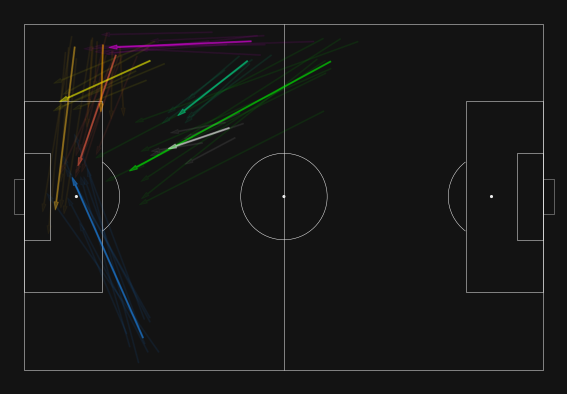

In [32]:
import matplotlib.pyplot as plt
import matplotlib.style as style


fig, axes = plt.subplots(figsize=(12, 7))
fig.set_facecolor("#131313")
# axes = axes.ravel()
passes = prog_df[prog_df["teamName"] == teamName]
passes = cluster(passes)
plot_clusters(axes, passes)

# for n in range(4):
#     team = "leeds"
#     ax = axes[n]
#     passes = prog_df[prog_df["teamName"] == team]
#     passes = cluster(passes)
#     plot_clusters(ax, passes)
#     add_ax_title(ax, team, column)

# add_title(fig, f'{home_team} vs {away_team}  |  Tactical Preview  |  Progressive Passes')
# add_subtitle(fig, 'Most Frequent types of progressive passes played by and against both teams  |  by @pwawrzynow')
# plt.subplots_adjust(left=0.045, right=0.955, bottom=0.03, top=0.88, wspace=0.1, hspace=0.15)
# fig.savefig('result.png', dpi=300)